In [1]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas as gpd
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import Polygon
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
import os
import platform
import shutil
import networkx as nx
import contextily as ctx
import matplotlib  as mpl
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 40}
mpl.rc('font', **font)


In [2]:
# load the corrected subbasin shapefiles with the 
cat = gpd.read_file('/Users/shg096/Desktop/mizuRoute_HDMA_Global/code/shp_output/HDMA_corrected_basin_HydroLAKES_polys_v10__final_2000000.shp')
riv = gpd.read_file('/Users/shg096/Desktop/mizuRoute_HDMA_Global/code/shp_output/hdma_global_stream.shp')
ds = xr.open_dataset('../data/Network_topology/Network_topology_lake_victoria.nc')
lake = gpd.read_file('/Volumes/F:/hydrography/hydrolakes/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp')


In [3]:
cat_slice = cat[cat['ID'].isin(np.array(ds['ID']))]
riv_slice = riv[riv['seg_id'].isin(np.array(ds['ID']))]
lake['x']=lake.geometry.centroid.x
lake['y']=lake.geometry.centroid.y
lake_slice = lake[lake['x']>20]
lake_slice = lake_slice[lake_slice['x']<50]
lake_slice = lake_slice[lake_slice['y']>-10]
lake_slice = lake_slice[lake_slice['y']<10]
intersection = gpd.overlay(cat_slice, lake_slice, how='intersection')

# print the resolvabale and non resolvabale lakes
print('total number of lakes: ',len(intersection['Hylak_id'].unique()))
print('resolvabale lakes: ',sum(cat_slice['lake']))


/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_20869/301820528.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lake['x']=lake.geometry.centroid.x
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_20869/301820528.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lake['y']=lake.geometry.centroid.y


total number of lakes:  207
resolvabale lakes:  6


/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_20869/301820528.py:9: UserWarning: `keep_geom_type=True` in overlay resulted in 174 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection = gpd.overlay(cat_slice, lake_slice, how='intersection')


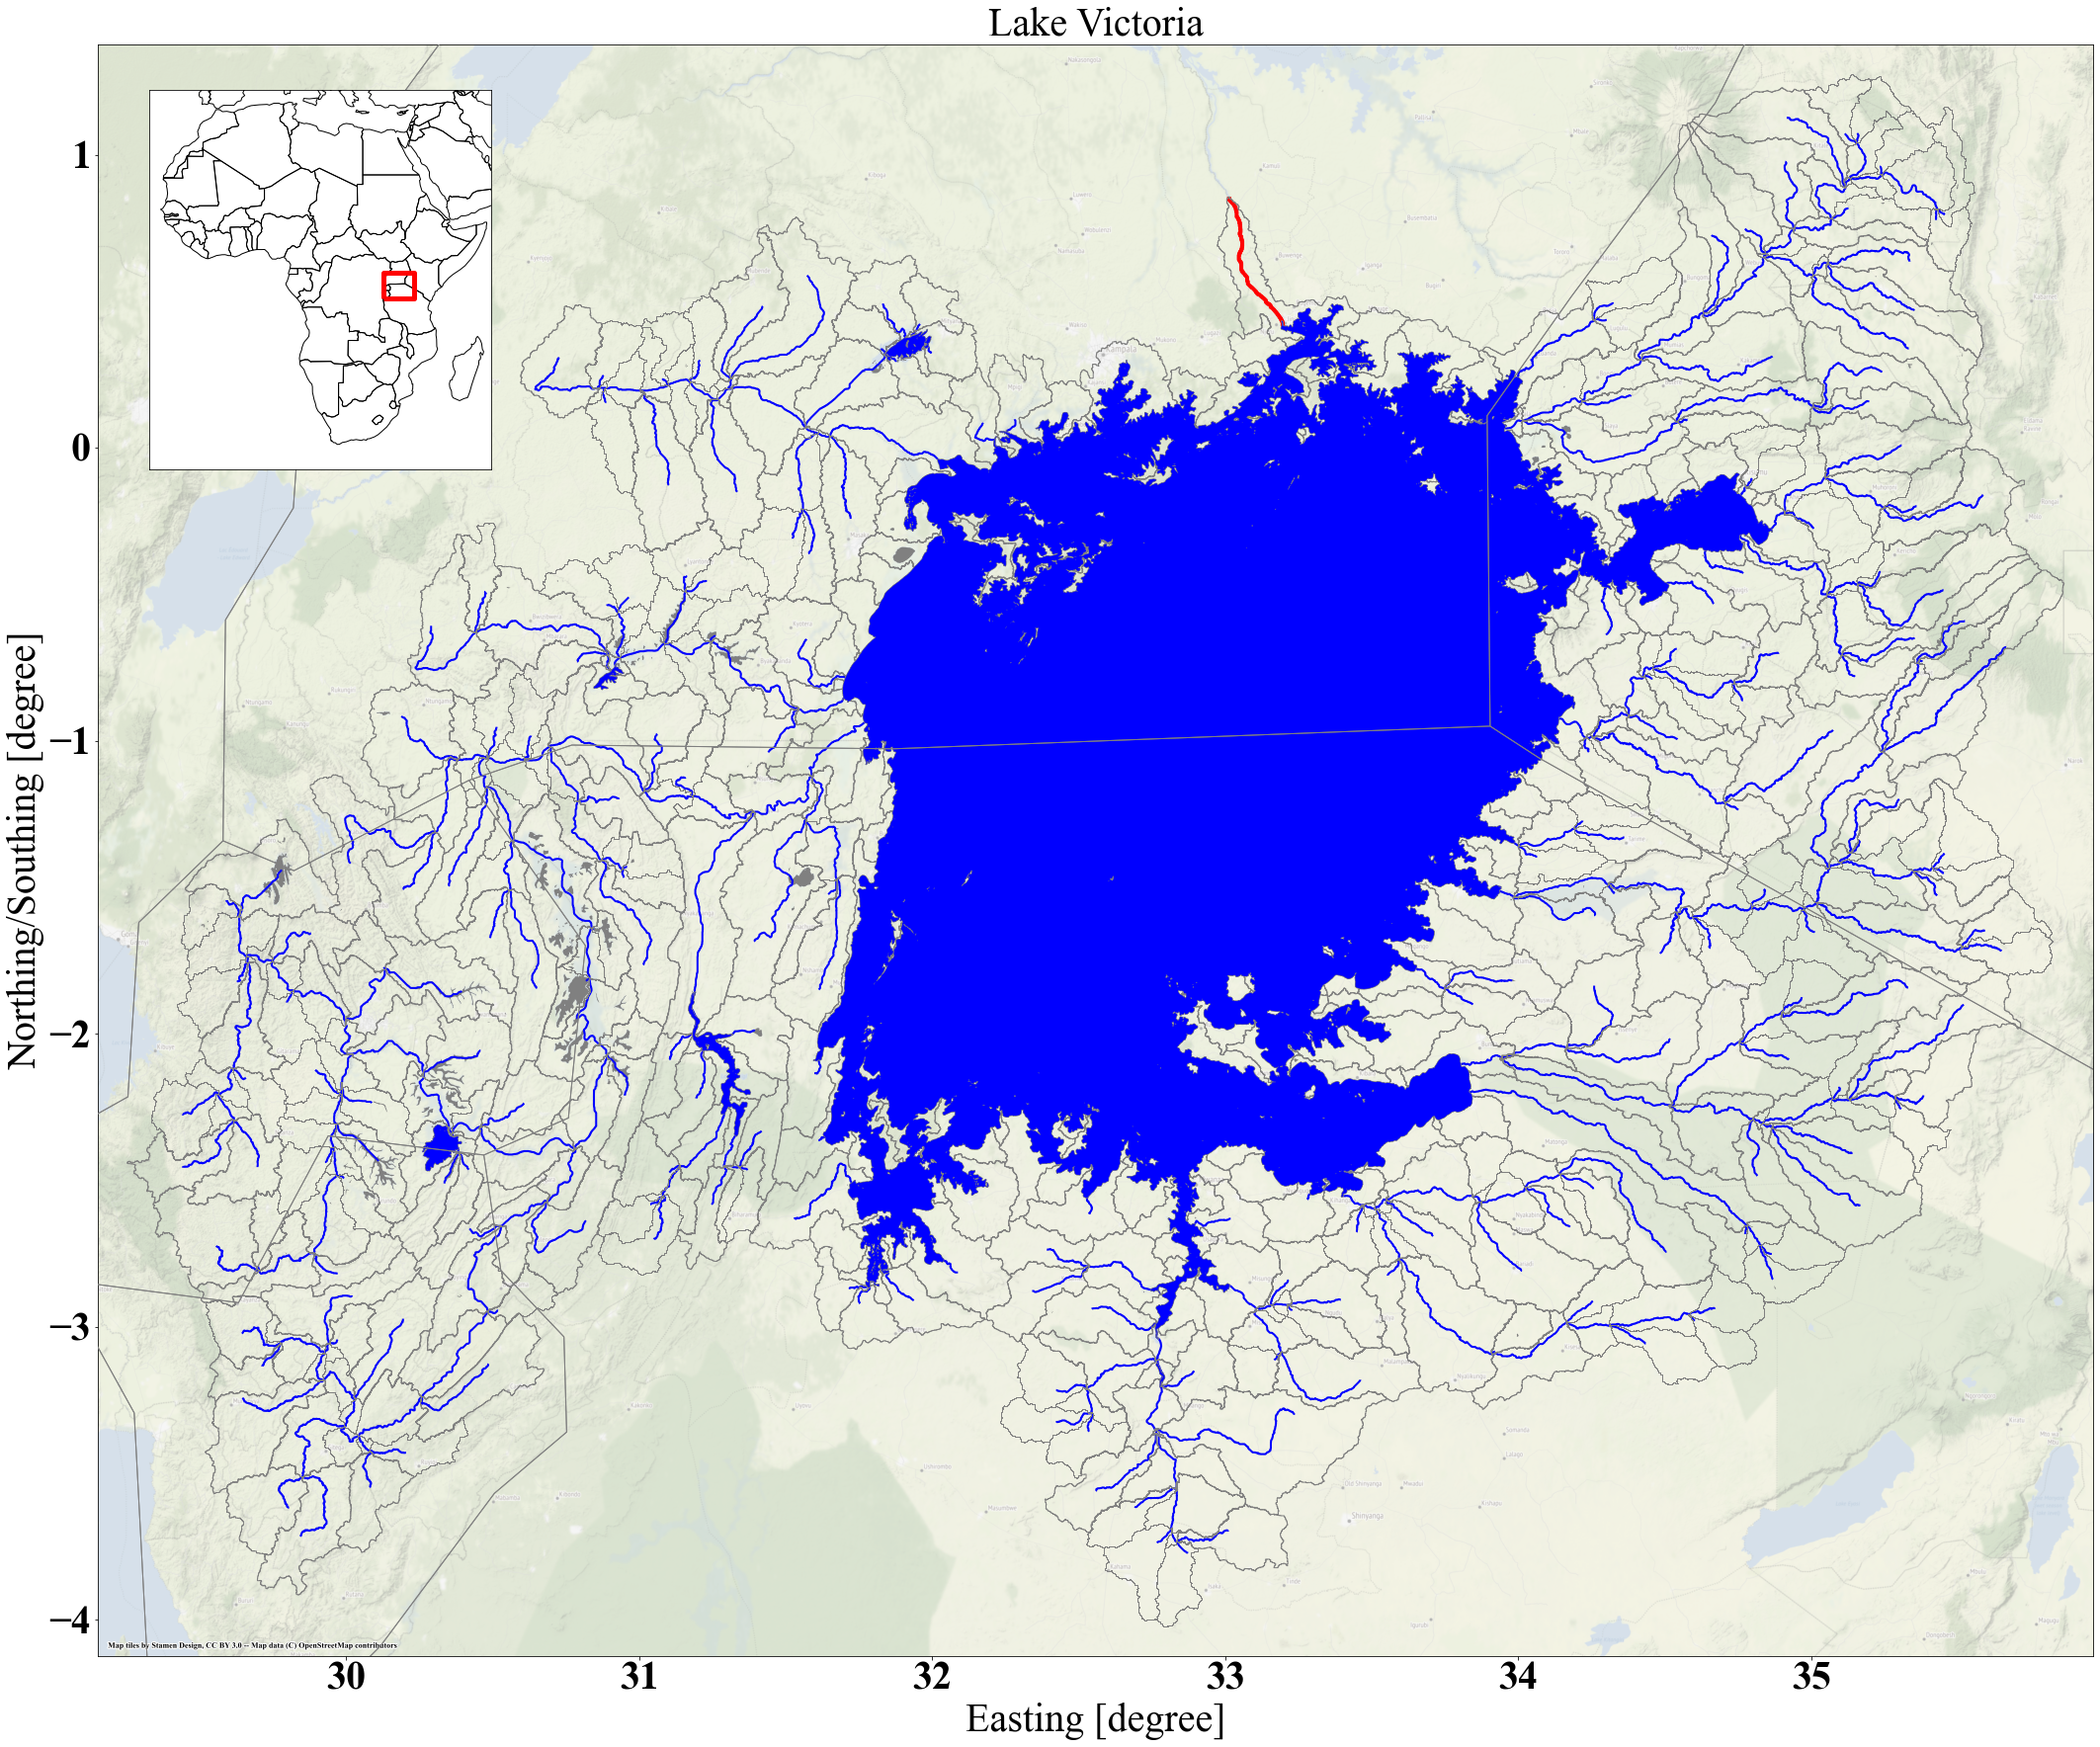

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#plotting
fig, ax = plt.subplots(figsize=(40,30))

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

cat_slice.plot (ax=ax,
                zorder=10,
                facecolor='none',
                edgecolor='grey')

lake = cat_slice [cat_slice['lake']==1]
lake.plot (ax=ax,
           zorder=15,
           facecolor='blue')

riv_slice.plot(ax=ax,
              linewidth=2,
              color='blue')

# make outflow as red segment
riv_slice_outflow = riv_slice.copy()
riv_slice_outflow = riv_slice_outflow[riv_slice_outflow['seg_id']==2062605]
riv_slice_outflow.plot(ax=ax,
                       linewidth=4,
                       color = 'red')


intersection.plot(ax=ax, color='grey')

world.plot(ax=ax,
           zorder=20,
           facecolor='none',
           edgecolor='grey')

# add title and save
plt.title('Lake Victoria', fontsize = 40)
plt.xlabel('Easting [degree]', fontsize = 40) #xlable which is long
plt.ylabel('Northing/Southing [degree]', fontsize = 40) #ylable which is lat

#
xmin, ymin, xmax, ymax = cat_slice.total_bounds
ax.axes.set_xlim(xmin-0.1,xmax+0.1)
ax.axes.set_ylim(ymin-0.1,ymax+0.1)

#
ax2 =fig.add_axes([0.18,0.68,0.12,0.18])
ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Plot the world countries
world.plot(ax=ax2, facecolor='none',
                    edgecolor='black')

ax2.axes.set_xlim(-20,52)
ax2.axes.set_ylim(-40,40)

#
rectangle = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])

# Create a GeoDataFrame with the rectangle polygon
rectangle = gpd.GeoDataFrame(geometry=[rectangle])

rectangle.plot(ax=ax2,facecolor='none',
               edgecolor='red', linewidth=5)

ctx.add_basemap(ax,
                crs=riv_slice.crs,
                zoom=10,
                alpha = 0.4)#,
                #source=ctx.providers.Stamen.TonerLite)

if not os.path.isdir('../fig/'):
    os.makedirs('../fig/')
    
plt.savefig('../fig/lake_victoria_map.png')


In [11]:
# save cat_slice for using in remapping of the varibales
if not os.path.isdir('../data/shp/'):
    os.makedirs('../data/shp/')
cat_slice.to_file('../data/shp/Victoria_cat.shp')
riv_slice.to_file('../data/shp/Victoria_riv.shp')


In [12]:
cat_slice

ID      area_cor      area_org  lake  \
128    2000128  2.512448e+08  2.512448e+08     0   
158    2000158  2.513185e+08  2.513185e+08     0   
283    2000283  2.322807e+08  2.522252e+08     0   
400    2000400  2.211995e+08  2.530411e+08     0   
508    2000508  2.540312e+08  2.540312e+08     0   
...        ...           ...           ...   ...   
66071  7001596  1.885300e+08  1.885300e+08     1   
66073  7001598  1.260800e+08  1.260800e+08     1   
66157  7015942  8.067000e+07  8.067000e+07     1   
66161  7015959  2.679000e+07  2.679000e+07     1   
66260  7180987  5.900000e+06  5.900000e+06     1   

                                                geometry  
128    POLYGON ((31.08250 -1.97500, 31.08250 -1.97583...  
158    POLYGON ((34.94833 0.00583, 34.94833 0.00500, ...  
283    MULTIPOLYGON (((30.90833 -0.77667, 30.90917 -0...  
400    POLYGON ((33.19250 0.37000, 33.19250 0.36917, ...  
508    POLYGON ((31.09917 -1.33333, 31.10000 -1.33333...  
...                                                  ...  
66071  POLYGON ((31.18916 -1.86833, 31.18845 -1.86943...  
66073  POLYGON ((30.31121 -2.31044, 30.31282 -2.31085...  
66157  POLYGON ((31.98084 0.39583, 31.97907 0.39315, ...  
66161  POLYGON ((30.92059 -0.73776, 30.92250 -0.73777...  
66260  POLYGON ((32.78056 -3.15527, 32.78103 -3.15626...  

[518 rows x 5 columns]

In [14]:
riv_slice = riv_slice.sort_values(by='flow_acc')
riv_slice

BotElev        Length  OBJECTID       PFAF     PFAF_CODE  PF_TYPE  \
128     1290.0    737.552337     129.0   22885741  2.288574e+11        6   
158     1140.0   1904.268227     159.0   22876641  2.287664e+11        6   
283     1249.0   1248.020087     284.0  228774921  2.287749e+11        7   
400     1134.0    954.538872     401.0    2287321  2.287321e+11        5   
508     1281.0   2575.693254     509.0  228836421  2.288364e+11        7   
...        ...           ...       ...        ...           ...      ...   
62506   1134.0   6417.955969   62507.0      22875  2.287500e+11        2   
62556   1134.0   9845.813784   62557.0     228737  2.287370e+11        2   
62561   1134.0  14557.670202   62562.0     228733  2.287330e+11        2   
62562   1134.0  13489.642115   62563.0     228731  2.287310e+11        2   
62605   1036.0  75139.767900   62606.0     228715  2.287150e+11        2   

       Shape_Leng     Slope  TopElev  Tosegment      end_x     end_y  \
128      0.006625 -0.002712   1288.0    2059226  30.861250 -2.034583   
158      0.017172  0.002101   1144.0    2022135  34.774583 -0.134583   
283      0.011196  0.000000   1249.0    2046339  30.908750 -0.761250   
400      0.008637  0.000000   1134.0    2062562  33.197917  0.291250   
508      0.023178  0.000000   1281.0    2024057  30.937917 -1.434583   
...           ...       ...      ...        ...        ...       ...   
62506    0.057702  0.000000   1134.0    2062556  33.209583  0.062917   
62556    0.088536  0.000000   1134.0    2062559  33.210417  0.150417   
62561    0.131046  0.000000   1134.0    2062562  33.197917  0.291250   
62562    0.121234  0.000000   1134.0    2062605  33.291250  0.356250   
62605    0.678090  0.001304   1134.0    2062608  33.012917  0.857083   

         flow_acc   seg_id    start_x   start_y  \
128       251.111  2000128  30.866667 -2.031667   
158       251.261  2000158  34.789167 -0.131667   
283       252.193  2000283  30.900833 -0.769167   
400       253.024  2000400  33.190833  0.295000   
508       253.934  2000508  30.958333 -1.429583   
...           ...      ...        ...       ...   
62506  219269.000  2062506  33.207083  0.006250   
62556  241040.000  2062556  33.209583  0.062917   
62561  242164.000  2062561  33.206250  0.171250   
62562  242512.000  2062562  33.197917  0.291250   
62605  264801.000  2062605  33.291250  0.356250   

                                                geometry  
128    LINESTRING (30.86667 -2.03167, 30.86458 -2.033...  
158    LINESTRING (34.78917 -0.13167, 34.78792 -0.132...  
283    LINESTRING (30.90083 -0.76917, 30.90875 -0.76125)  
400    LINESTRING (33.19083 0.29500, 33.19208 0.29375...  
508    LINESTRING (30.95833 -1.42958, 30.95708 -1.429...  
...                                                  ...  
62506  LINESTRING (33.20708 0.00625, 33.20708 0.01542...  
62556  LINESTRING (33.20958 0.06292, 33.20958 0.06708...  
62561  LINESTRING (33.20625 0.17125, 33.20625 0.17458...  
62562  LINESTRING (33.19792 0.29125, 33.19875 0.29208...  
62605  LINESTRING (33.29125 0.35625, 33.29125 0.35792...  

[512 rows x 17 columns]